# **Sentimentent Analysis and Modeling On Amazon Customer Reviews**

**Importing Libraries**

In [1]:
# First import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

 **Exploring Dataset**

In [2]:
# Importing a CSV file into a DataFrame using pandas
# 'df' will hold the data read from the specified file path
df=pd.read_csv("C:\\Users\\Dan\\Desktop\\An2\\Sem1\\TM\\Reviews.csv")

In [3]:
# Creating a copy of the DataFrame 'df' and storing it in 'df2'
# This ensures any modifications to 'df2' will not affect the original 'df'
df2=df.copy()

# Displaying the first 1000 rows of the DataFrame 'df'
# Useful for inspecting a subset of the data to understand its structure or contents
df.head(1000)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [4]:
# Know number of columns and rows
df.shape

(568454, 10)

In [5]:
# Displaying a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
# Accessing the 'Text' column from the DataFrame 'df'
df['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

In [7]:
# Dropping unnecessary columns from the DataFrame 'df' to perform sentiment analysis
df.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessDenominator','HelpfulnessNumerator','Time',
        'Summary'],axis=1,inplace=True)


In [8]:
# to ensure that there are only 2 columns
df.columns

Index(['Score', 'Text'], dtype='object')

In [9]:
# to check for null values after in Text and Score column
df.isna().sum()

Score    0
Text     0
dtype: int64

In [10]:
# To check for duplicates
df.duplicated().sum()

174779

In [11]:
# Removing duplicate rows from the DataFrame 'df'
df.drop_duplicates(inplace=True)

In [12]:
# Displaying the dimensions of the DataFrame 'df' (568454 to 393675)
df.shape

(393675, 2)

**Exploring Target Column `Score`**

In [13]:
# Show number of unique values in score column
df['Score'].nunique()

5

In [14]:
# Show unique values in score column
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

**Distribution of Ratings in `Score` Column**

In [15]:
# Show value distibution of score ratings
df['Score'].value_counts()/len(df)*100

5    63.693402
4    14.243729
1     9.215724
3     7.562583
2     5.284562
Name: Score, dtype: float64

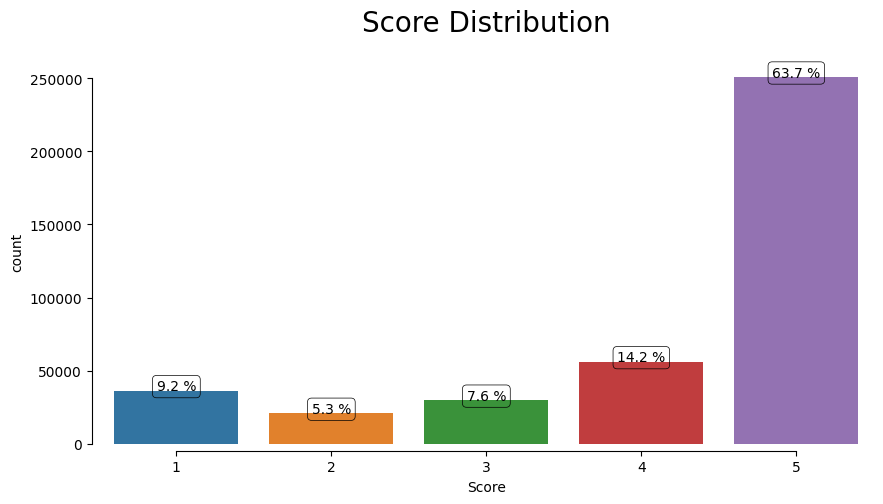

In [16]:
# Setting the figure size for the plot
plt.figure(figsize=(10,5))
# Creating a count plot to visualize the distribution of the 'Score' column
ax=sns.countplot(x=df['Score'])
# Calculating the total number of rows in the DataFrame for percentage calculation
total=float(len(df))
# Adding percentage labels on top of each bar in the count plot
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 75,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
# Setting the title of the plot
ax.set_title('Score Distribution', fontsize=20, y=1.05)
# Removing the right spine of the plot for a cleaner look
sns.despine(right=True)
# Further customizing the spines by offsetting them and trimming excess lines
sns.despine(offset=5, trim=True)

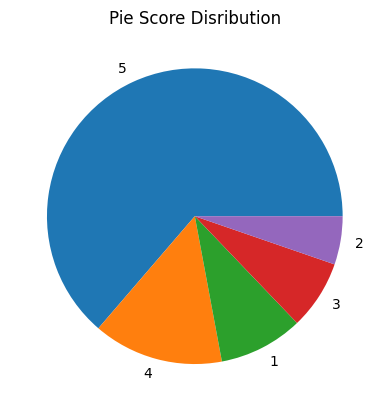

In [17]:
# Getting the count of unique values in the 'Score' column
score_values=df['Score'].value_counts()
# Creating a pie chart to visualize the distribution of scores
plt.pie(score_values,labels=score_values.index)
# Adding a title to the pie chart
plt.title('Pie Score Disribution')
plt.show()

**Taking Samples from `Score` Column to make the data balanced**

In [18]:
#Creating a new DataFrame
new_df= df.groupby('Score').apply(lambda x: x.sample(10000)).reset_index(drop=True)

In [19]:
#Display the new DataFrame
new_df

,Score,Text
0,1,Note that the shipping charge for this product...
1,1,I have loved the Good Earth Original Sweet and...
2,1,This is not so good. However it tests well. Ho...
3,1,"First off, I usually don't write reviews on am..."
4,1,They missed Christmas delivery by 5 days! Cust...
...,...,...
49995,5,Yuban is the best coffee on the market. It has...
49996,5,I have only used one other brand of coconut oi...
49997,5,Perfect for superautomatic espresso machines (...
49998,5,temptations cat treats are the only treats my ...


In [20]:
# Know number of columns and rows
new_df.shape

(50000, 2)

**Ensure Score Distribution After Sampling**

In [21]:
# Counting the occurrences of each unique value in the 'Score' column of the new DataFrame
new_df['Score'].value_counts()

1    10000
2    10000
3    10000
4    10000
5    10000
Name: Score, dtype: int64

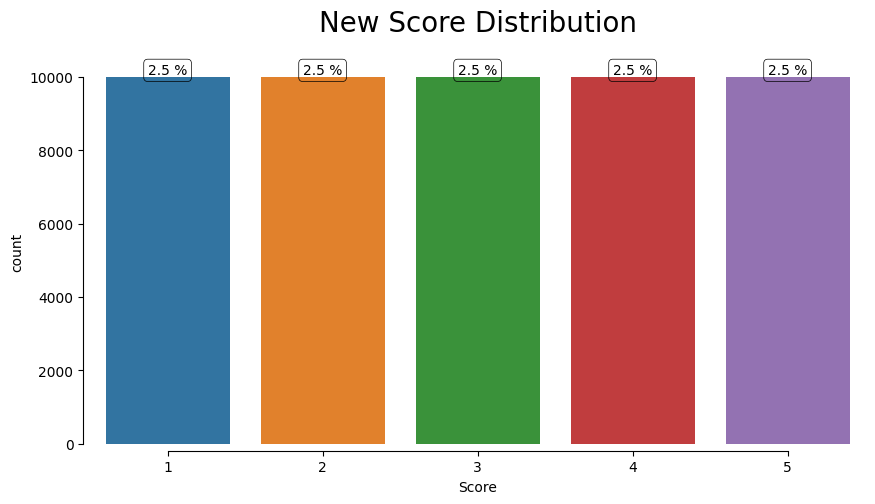

In [22]:
# New Score distribution on a graphic - Score Column is balanced and each value have the same distribution so the model won't be biased to specific value
plt.figure(figsize=(10,5))
ax=sns.countplot(x=new_df['Score'])
total=float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 75,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
ax.set_title('New Score Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

 **Text Preprocessing**

In [23]:
# import libraies for preprocessing
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Set of English stop words for text preprocessing
stop_words=set(stopwords.words('english'))
#lemmatization=WordNetLemmatizer()
# Initializing PorterStemmer for word stemming (reduces to root form)
stemming=PorterStemmer()

In [26]:
# Downloading NLTK resources needed for text processing
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [27]:
def clean_text(text):
    # 1. Convert to lower
    txt=text.lower()

    # 1. split to words
    tokens=word_tokenize(text)

    # 3. remove punctuation
    tokens=[word for word in tokens if word not in string.punctuation]

    # 4. Remove stopwords
    tokens=[word for word in tokens if word not in stop_words]

    # 5. Remove numbers
    tokens=[word for word in tokens if not word.isdigit()]

    # 6. Apply Stemming
    tokens=[stemming.stem(word) for word in tokens]

    # To return these single words back into one string
    return ' '.join(tokens)


In [ ]:
 # Applying the 'clean_text' function to the 'Text' column
new_df['cleaned_text'] = new_df['Text'].apply(clean_text)

KeyboardInterrupt: 

In [ ]:
# Display the new data frame
new_df

,Score,Text,cleaned_text
0,1,These yams were to be a welcome addition to my...,these yam welcom addit diet better heathier ch...
1,1,UPDATED APRIL 2012: I'm returning 6 more pouch...,updat april i 'm return pouch purebit chicken ...
2,1,I do not reccomend this product. It does not t...,i reccomend product it tast regular soy sauc i...
3,1,I originally purchased this product from Amazo...,i origin purchas product amazon month ago sati...
4,1,I made a mistake of buying this tea during Chr...,i made mistak buy tea christma time ultim mist...
...,...,...,...
49995,5,Perfect addition to my wedding reception candy...,perfect addit wed recept candi buffet they viv...
49996,5,I work as a security guard at a hospital here ...,i work secur guard hospit town i hate eat cafe...
49997,5,"I bought these candies for a special occasion,...",i bought candi special occas bar mitzvah i loo...
49998,5,This is the best pizza sauce anywhere!!! Don ...,thi best pizza sauc anywher don pepino 's flav...


**Show most frequent words in text after preprocessing**

In [ ]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


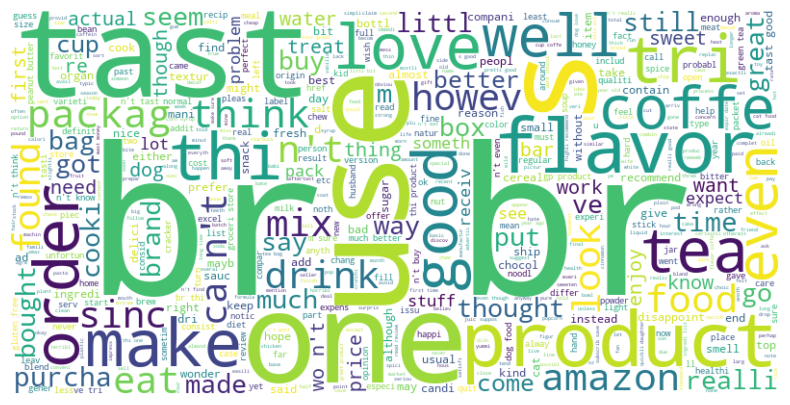

In [ ]:
from wordcloud import WordCloud

# Combine all cleaned text into a single string
all_text=' '.join(new_df['cleaned_text'])

# Create the WordCloud object with the top 1000 words
wordcloud = WordCloud(width=800, height=400, max_words=1000, background_color='white').generate(all_text)

# Plot the WordCloud using matplotlib
plt.figure(figsize=(10, 5))  # Set figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
# Calculating the number of unique elements in the 'all_text' collection
len(set(all_text))

67

In [ ]:
# Calculating the total number of elements in the 'all_text' collection
len(all_text)

14510681

**Vectorizing Text to numbers before Modeling**

In [ ]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForest
#from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline



 **Spliting Data**

In [ ]:
# Converting 'Score' values to binary labels:
new_df['Score'] = new_df['Score'].apply(lambda x: 1 if x >=3 else 0)
# 1 --> Good 
# 0 --> Bad

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separating features (X) and target labels (y)
X=new_df['cleaned_text']
y=new_df['Score']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size = 0.20)


 **Modeling Using ML Models**

1. Logistic Regression

In [ ]:
# Creating a pipeline for text classification
logistic_pipe=Pipeline(
    [
      ('vec',CountVectorizer(stop_words= "english")),
        ('Tf_idf',TfidfTransformer()),
        ('log_rg',LogisticRegression()),

    ]
)


In [ ]:
# Fitting the logistic regression pipeline to the training data
log_fit = logistic_pipe.fit(X_train,y_train)


In [ ]:
# Making predictions on the test data using the fitted logistic regression pipeline
log_pred=logistic_pipe.predict(X_test)

In [ ]:
print('Training accuracy:', log_fit.score(X_train,y_train))
print('Test accuracy:', log_fit.score(X_test,y_test))

Training accuracy: 0.8312
Test accuracy: 0.7862


<Axes: >

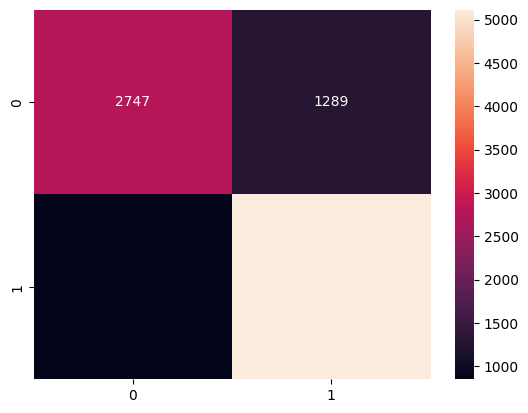

In [ ]:
# Plotting a heatmap of the confusion matrix for the test set predictions
sns.heatmap(confusion_matrix(y_test,log_pred), annot=True, fmt="d")

- Making Predicion using Logistic Regression

In [ ]:
reviews=['very bad,I dont recommend it at all',
         'experience was terrible',
         'I will buy again from this site,everything was perfect']
prediction=logistic_pipe.predict(reviews)
sentiment=["Positive" if i == 1 else "Negative" for i in prediction]
print(sentiment)

['Negative', 'Negative', 'Positive']


2. Naive Bayes

              precision    recall  f1-score   support

           0     0.8348    0.3630    0.5060      4036
           1     0.6882    0.9514    0.7986      5964

    accuracy                         0.7139     10000
   macro avg     0.7615    0.6572    0.6523     10000
weighted avg     0.7473    0.7139    0.6805     10000



<Axes: >

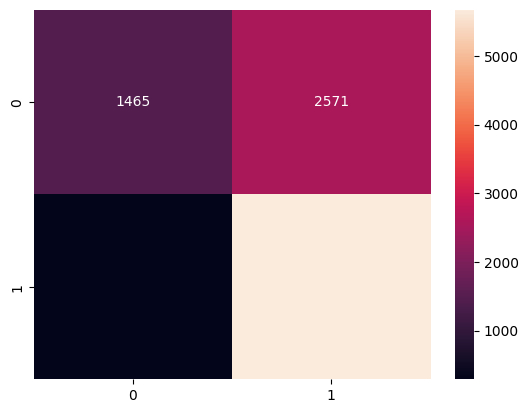

In [ ]:
naive_bayes_pipeline = Pipeline([
    ('vec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

# Train the model
nb_model = naive_bayes_pipeline.fit(X_train, y_train)
y_pred_nb = naive_bayes_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_nb,digits=4))
sns.heatmap(confusion_matrix(y_test,y_pred_nb), annot=True, fmt="d")

In [ ]:
print('Training accuracy of Navie Bayes : ', nb_model.score(X_train,y_train))
print('Test accuracy of Navie Bayes : ', nb_model.score(X_test,y_test))

Training accuracy of Navie Bayes :  0.761325
Test accuracy of Navie Bayes :  0.7139


- Making Predicion using Naive Bayes

In [ ]:
reviews=['very good, I recommend it',
         'experience was terrible',
         'I will buy again from this site,everything was perfect']
prediction=naive_bayes_pipeline.predict(reviews)
sentiment=["Positive" if i == 1 else "Negative" for i in prediction]
print(sentiment)

['Positive', 'Negative', 'Positive']


 **Modeling Using Recurrent Neural Network Models `RNN`**

LSTM

- Apply LSTM on Text column only

In [ ]:
new_df['Score']

0        0
1        0
2        0
3        0
4        0
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: Score, Length: 50000, dtype: int64

In [ ]:
new_df['Text']

0        These yams were to be a welcome addition to my...
1        UPDATED APRIL 2012: I'm returning 6 more pouch...
2        I do not reccomend this product. It does not t...
3        I originally purchased this product from Amazo...
4        I made a mistake of buying this tea during Chr...
                               ...                        
49995    Perfect addition to my wedding reception candy...
49996    I work as a security guard at a hospital here ...
49997    I bought these candies for a special occasion,...
49998    This is the best pizza sauce anywhere!!!  Don ...
49999    I agree with the previous comment that it's li...
Name: Text, Length: 50000, dtype: object

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import regularizers

In [ ]:
reviews=new_df['Text'].values
sentiments=new_df['Score'].values

# Apply tokenization
tokenizer=Tokenizer(num_words=20000)
tokenizer.fit_on_texts(reviews)
sequences=tokenizer.texts_to_sequences(reviews)

# Padding sequences on reviews to have same length
max_len = 150  # Adjusted max length as reviews are longer
# X as input
X = pad_sequences(sequences, maxlen=max_len)

# Convert sentiments to numpy array
y = np.array(sentiments)



In [ ]:
# check reviews
print(reviews)

['These yams were to be a welcome addition to my diet as a better, heathier choice. They fell extremely short of my expectations due to their mushiness. It seems as though these may have been cooked to be used for baby food. Each can has about 1/4 sweet potato silt and many cans are dented. This is a DO NOT BUY!'
 'UPDATED APRIL 2012: I\'m returning 6 more pouches of PureBites Chicken today, after first calling the company for instructions. The same rep (female) who responded to my complaint in  Dec 2011 took my call today, but not knowing I had called before, she kept insisting there has never been a complaint about rancid bits before. I told her I called in Dec and she said "someone else likely helped you". Not wanting to argue, I moved on, but she clearly lied to me so I thought I should update about this. I was asked to include a note this time, to say where purchased but that has nothing to do with the fact that the company thinks it\'s "acceptable" that some fat is getting thru v

In [ ]:
# Check seuences hat icludes indices
print(sequences[:5])

[[28, 11922, 60, 5, 27, 3, 3809, 881, 5, 16, 354, 21, 3, 86, 608, 23, 1571, 710, 818, 7, 16, 1648, 614, 5, 108, 11202, 6, 321, 21, 171, 28, 212, 19, 89, 808, 5, 27, 114, 12, 514, 72, 228, 49, 51, 66, 118, 153, 117, 869, 17413, 4, 164, 357, 22, 1066, 10, 8, 3, 77, 15, 81], [3885, 3504, 1480, 83, 1948, 232, 46, 1557, 7, 15360, 295, 802, 87, 98, 3192, 1, 304, 12, 909, 1, 138, 4171, 3480, 146, 3810, 5, 16, 1167, 11, 5185, 1412, 416, 16, 738, 802, 14, 15, 1717, 2, 44, 592, 144, 142, 1057, 13911, 67, 51, 169, 89, 3, 1167, 66, 1803, 877, 144, 2, 795, 190, 2, 592, 11, 5185, 4, 142, 258, 527, 433, 999, 1562, 20, 15, 1840, 5, 5186, 2, 2240, 25, 14, 142, 1183, 8574, 5, 48, 26, 2, 155, 2, 194, 934, 66, 10, 2, 17, 1168, 5, 1471, 3, 711, 10, 82, 5, 159, 328, 235, 14, 13, 51, 280, 5, 77, 18, 1, 377, 13, 1, 304, 2879, 45, 1659, 13, 59, 318, 8, 323, 2202, 1370, 2563, 318, 561, 27, 1234, 461, 26, 6, 50, 1114, 1803, 85, 32, 1234, 461, 393, 16, 499, 311, 4, 191, 149, 10, 17, 6077, 1, 2665, 82, 2, 592, 273

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define LSTM Parameters
voca_size=20000  # as input
embedding_size=200  # as output

In [ ]:
model=Sequential()
model.add(Embedding(input_dim=voca_size,output_dim=embedding_size,input_length=max_len))
model.add(LSTM(256,recurrent_dropout=0.3,dropout=0.3))
model.add(Dropout(0.5)) 
model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

In [ ]:
# Compile the model
import tensorflow as tf
#op=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model_checkpoint = ModelCheckpoint(
    'best_model1.keras',  # File path where the model will be saved
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the model with the best validation loss
    mode='min',  # 'min' because lower loss is better
    verbose=1  # Verbosity mode
)

# Train the LSTM model
history1=model.fit(X_train, y_train, 
          epochs=12, 
          batch_size=128, 
          validation_data=(X_test, y_test)
          , callbacks=[early_stopping,model_checkpoint])

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.7602 - loss: 0.5153
Epoch 1: val_loss improved from inf to 0.46388, saving model to best_model1.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 102s 321ms/step - accuracy: 0.7603 - loss: 0.5153 - val_accuracy: 0.7855 - val_loss: 0.4639
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.8081 - loss: 0.4388
Epoch 2: val_loss did not improve from 0.46388
313/313 ━━━━━━━━━━━━━━━━━━━━ 97s 310ms/step - accuracy: 0.8081 - loss: 0.4388 - val_accuracy: 0.7573 - val_loss: 0.4964
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.8242 - loss: 0.4082
Epoch 3: val_loss did not improve from 0.46388
313/313 ━━━━━━━━━━━━━━━━━━━━ 97s 311ms/step - accuracy: 0.8242 - loss: 0.4082 - val_accuracy: 0.7845 - val_loss: 0.4724
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8507 - loss: 0.3626
Epoch 4: val_loss did not improve from 0.46388
313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 299ms/step - accuracy: 0.8507 -

**Show Trainning and Validation Accuracy**

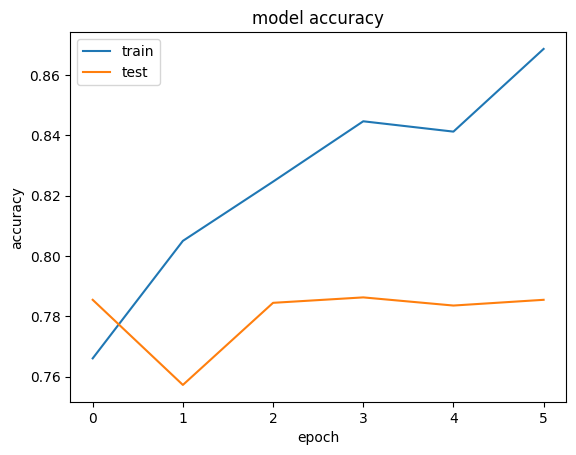

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- Show Trainning and Validation Loss

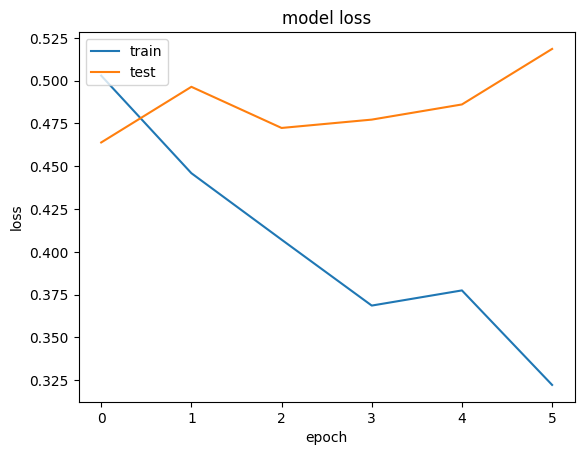

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the final accuracy
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7859 - loss: 0.5126
Final Test Accuracy: 78.55%


Classification CNN

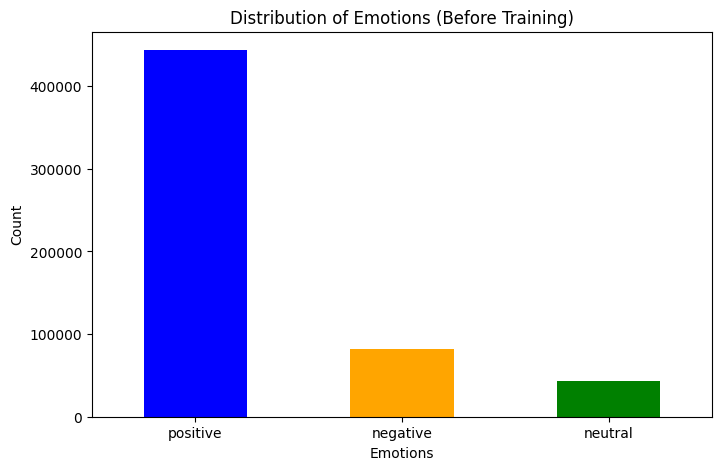

c:\Users\Dan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Dan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7495 - loss: 17.1108 - val_accuracy: 0.7830 - val_loss: 0.6628
Epoch 2/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7808 - loss: 0.6686 - val_accuracy: 0.7830 - val_loss: 0.6627
Epoch 3/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7803 - loss: 0.6688 - val_accuracy: 0.7830 - val_loss: 0.6628
Epoch 4/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7806 - loss: 0.6689 - val_accuracy: 0.7830 - val_loss: 0.6628
Epoch 5/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7789 - loss: 0.6706 - val_accuracy: 0.7830 - val_loss: 0.6627
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 2s 615us/step - accuracy: 0.7823 - loss: 0.6642
Test Accuracy: 78.30%
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 2s 689us/step
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00     16181
     neutral       0.00      0.00      0.00      8485
    positive       0.78      1.00      0.88  

c:\Users\Dan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


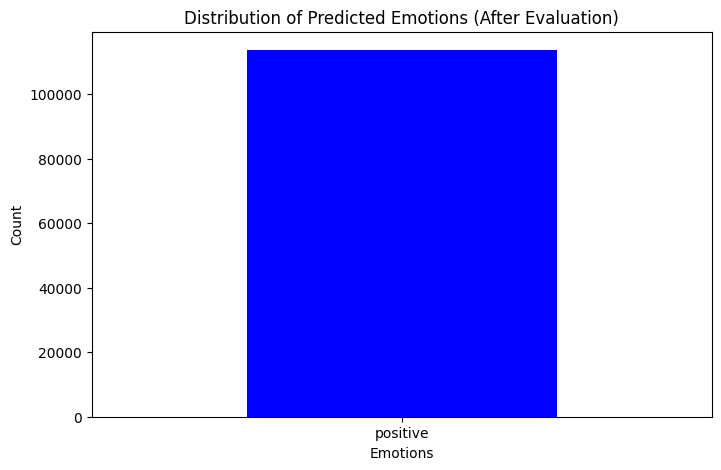

In [33]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('Reviews.csv')

# Remove missing values from the relevant columns
data.dropna(subset=['Text', 'Score'], inplace=True)

# Map `Score` to emotions (1-2: 'negative', 3: 'neutral', 4-5: 'positive')
def map_score_to_emotion(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

data['emotion'] = data['Score'].apply(map_score_to_emotion)

# Visualize the distribution of emotions (Before Model Training)
emotion_counts = data['emotion'].value_counts()
plt.figure(figsize=(8, 5))
emotion_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribution of Emotions (Before Training)')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Tokenize the `Text` column
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['Text'])
X = tokenizer.texts_to_sequences(data['Text'])
X = pad_sequences(X, padding='post', maxlen=100)  # Limit sequences to 100 tokens

# Encode the `emotion` labels
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data['emotion'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

# Visualize the distribution of predicted emotions (After Model Evaluation)
predicted_emotions = label_encoder.inverse_transform(y_pred_classes)
predicted_counts = pd.Series(predicted_emotions).value_counts()

plt.figure(figsize=(8, 5))
predicted_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribution of Predicted Emotions (After Evaluation)')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
